In [477]:
#Task 1
import pandas as pd
import numpy as np

PLdf = pd.read_csv('PLvacation.csv', header=1)
GBdf = pd.read_csv('GBvacation.csv', header=1)
USAdf = pd.read_csv('USAvacation.csv', header=1)

PLdf['datetime']=pd.to_datetime(PLdf['Miesiąc'])
PLdf.drop('Miesiąc',axis=1,inplace=True)

GBdf['datetime']=pd.to_datetime(GBdf['Miesiąc'])
GBdf.drop('Miesiąc',axis=1,inplace=True)

USAdf['datetime']=pd.to_datetime(USAdf['Miesiąc'])
USAdf.drop('Miesiąc',axis=1,inplace=True)


In [478]:
PLdf.rename(columns={'vacation: (Polska)': "PL"}, inplace=True)
GBdf.rename(columns={'vacation: (Wielka Brytania)': "GB"}, inplace=True)
USAdf.rename(columns={'vacation: (Stany Zjednoczone)': "USA"}, inplace=True)

In [479]:
frames = [PLdf, GBdf, USAdf]

df=pd.merge(PLdf, GBdf, on=('datetime'))
df=pd.merge(df, USAdf, on=('datetime'))
columns_titles = ["datetime","PL","GB","USA"]

df=df.reindex(columns=columns_titles)
df

,datetime,PL,GB,USA
0,2004-01-01,42,38,87
1,2004-02-01,100,32,76
2,2004-03-01,66,35,71
3,2004-04-01,90,33,66
4,2004-05-01,82,33,80
...,...,...,...,...
214,2021-11-01,37,24,48
215,2021-12-01,69,42,61
216,2022-01-01,70,31,52
217,2022-02-01,86,27,53


<AxesSubplot:xlabel='datetime'>

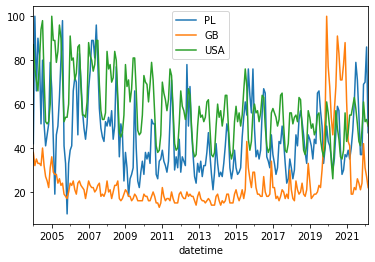

In [480]:
import matplotlib.pyplot as plt
df.plot(x='datetime')

In [481]:
df.describe()

,PL,GB,USA
count,219.000000,219.000000,219.000000
mean,45.794521,24.543379,58.301370
std,17.214213,14.441330,14.830249
min,10.000000,13.000000,26.000000
25%,33.000000,17.000000,49.000000
50%,42.000000,20.000000,56.000000
75%,54.000000,24.500000,67.000000
max,100.000000,100.000000,100.000000


<AxesSubplot:>

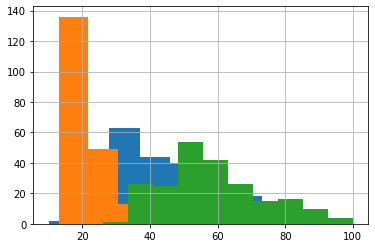

In [482]:
df["PL"].hist()
df["GB"].hist()
df["USA"].hist()

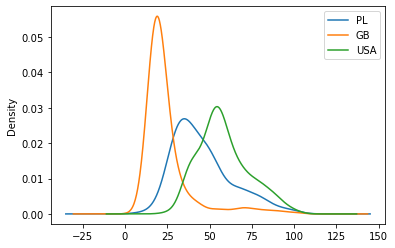

In [483]:
plt=df['PL'].plot.density()
df['GB'].plot.density()
df['USA'].plot.density()
plt.legend('PL GB USA'.split())

In [492]:
#Task 2
SLdf = pd.read_csv('StLouis.csv', header=4)
SLdf

,Date,Value,Anomaly
0,193804,57.6,0.3
1,193805,65.6,-1.4
2,193806,74.4,-2.0
3,193807,81.6,1.3
4,193808,82.1,3.5
...,...,...,...
1001,202109,74.9,4.0
1002,202110,63.9,4.4
1003,202111,46.7,0.6
1004,202112,47.0,11.4


In [485]:
SLdf.replace(-99, np.nan, inplace=True)

In [493]:
SLdf['Value']=SLdf['Value'].interpolate()

In [487]:
SLdf['datetime']=pd.to_datetime(SLdf['Date'], format='%Y%m')
SLdf.drop('Date',axis=1,inplace=True)

<AxesSubplot:xlabel='datetime'>

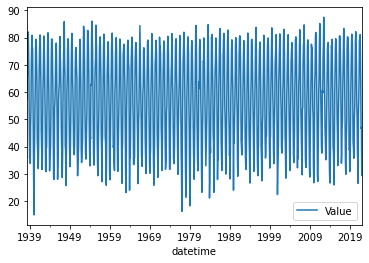

In [488]:
columns_titles = ["datetime","Value","Anomaly"]
SLdf=SLdf.reindex(columns=columns_titles)
import matplotlib.pyplot as plt
SLdf.plot(x='datetime', y='Value')

<AxesSubplot:>

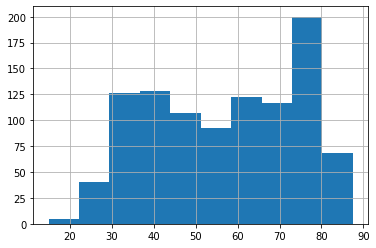

In [489]:
SLdf["Value"].hist()

<AxesSubplot:ylabel='Density'>

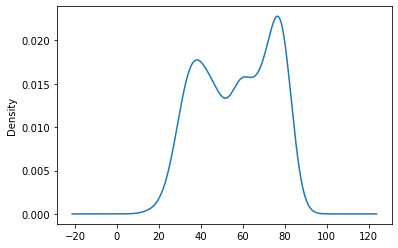

In [490]:
SLdf["Value"].plot.density()

In [491]:
SLdf.describe()

,Value,Anomaly
count,1006.000000,1006.000000
mean,57.054225,-0.146521
std,17.513775,5.882679
min,14.900000,-144.700000
25%,41.000000,-2.200000
50%,58.750000,0.000000
75%,73.875000,2.400000
max,87.500000,14.900000
